# Data Visualization

### Setting-up

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
import datetime

%run data_cleaning.ipynb

In [2]:
nyc = df1
sao = df2

In [3]:
nyc['tot_duration'] = nyc["out_duration"] + nyc["in_duration"]
sao['tot_duration'] = sao["out_duration"] + sao["in_duration"]

In [4]:
cur_time = datetime.datetime.now()
month = cur_time.strftime('%b')

In [5]:
nyc['date'] = pd.to_datetime(nyc['day_scrap'].astype(str) + ' ' + month + ' ' +nyc['hour_scrap'].astype(str), format='%d %b %H')
nyc['date']= nyc['date'].dt.strftime('%d %b %I %p')

In [6]:
sao['date'] = pd.to_datetime(sao['day_scrap'].astype(str) + ' ' + month + ' ' +sao['hour_scrap'].astype(str), format='%d %b %H')
sao['date']= sao['date'].dt.strftime('%d %b %I %p')

In [7]:
swiss_air_nyc = nyc.loc[nyc["in_airline_company"] != "Lufthansa"]
lufthansa_air_nyc = nyc.loc[nyc["in_airline_company"] == "Lufthansa"]

In [8]:
swiss_air_sao = sao.loc[sao["in_airline_company"] != "Lufthansa"]
lufthansa_air_sao = sao.loc[sao["in_airline_company"] == "Lufthansa"]

in_airline_company and out_airline_company have the same values for a given row.
To describe either in_airline_company or out_air_line company is the same. This gave us:
* the count (the lenght of the dataframe rows),
* number of unique values (2: Swiss or Lufthansa), 
* the top (the unique value which is the most frequent in the dataframe) and 
* the frequency (which is the number of frequecy of the top).

In [9]:
nyc["in_airline_company"].describe()

count       288
unique        2
top       Swiss
freq        198
Name: in_airline_company, dtype: object

In [10]:
sao["in_airline_company"].describe()

count           265
unique            2
top       Lufthansa
freq            138
Name: in_airline_company, dtype: object

In [11]:
nyc["ticket_price"].describe()

count     288.000000
mean      979.003368
std       161.711521
min       678.720000
25%       833.720000
50%      1058.720000
75%      1074.280000
max      1198.390000
Name: ticket_price, dtype: float64

In [12]:
swiss_air_nyc["ticket_price"].describe()

count     198.000000
mean      910.864343
std       142.558637
min       678.720000
25%       787.200000
50%       933.720000
75%      1074.280000
max      1074.280000
Name: ticket_price, dtype: float64

In [13]:
lufthansa_air_nyc["ticket_price"].describe()

count      90.000000
mean     1128.909222
std        79.311958
min       923.390000
25%      1073.390000
50%      1176.010000
75%      1196.160000
max      1198.390000
Name: ticket_price, dtype: float64

In [14]:
swiss_air_sao["ticket_price"].describe()

count     127.000000
mean     1918.167953
std       129.064348
min      1799.680000
25%      1799.680000
50%      1944.420000
75%      2094.420000
max      2120.290000
Name: ticket_price, dtype: float64

In [15]:
lufthansa_air_sao["ticket_price"].describe()

count     138.000000
mean     1940.780797
std       132.197464
min      1817.900000
25%      1817.900000
50%      1948.600000
75%      1948.600000
max      2215.750000
Name: ticket_price, dtype: float64

## Line Plot

1. Line plots for NYC destination

In [16]:
def plot_df(df, month = month):
    test = df.groupby(['day_scrap', 'hour_scrap'])['ticket_price'].agg(['min', 'mean', 'max'])
    test = test.reset_index()
    test['date'] = pd.to_datetime(test['day_scrap'].astype(str) + ' ' + month + ' ' + test['hour_scrap'].astype(str), format='%d %b %H')
    plt.fill_between(test['date'], test['min'], test['max'], alpha=0.3)
    plt.xticks(rotation=90)
    plt.plot(test['date'], test['mean'], "-s")
    plt.ylim(500, 2500)
    # plt.yticks(range(700, 1300, 50))
    plt.xlabel("Date")
    plt.ylabel("Price [€]")

    ax = plt.gca()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %I %p'))

    plt.show()

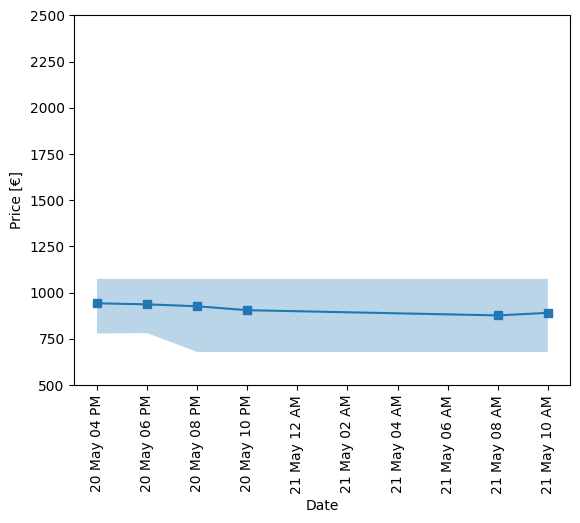

In [17]:
plot_df(df = swiss_air_nyc)

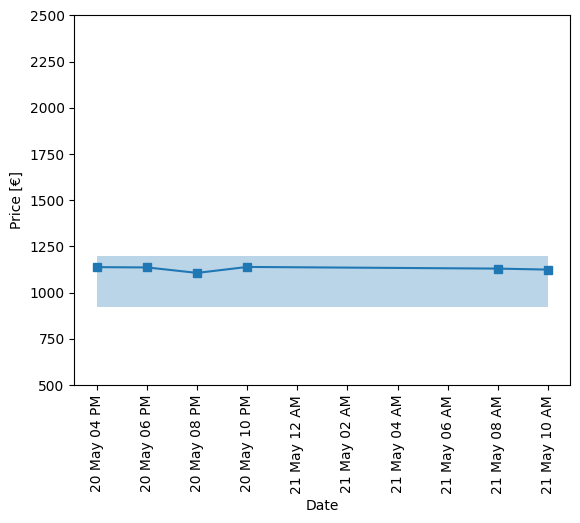

In [18]:
plot_df(df = lufthansa_air_nyc)

2. Line plot for São Paulo destination

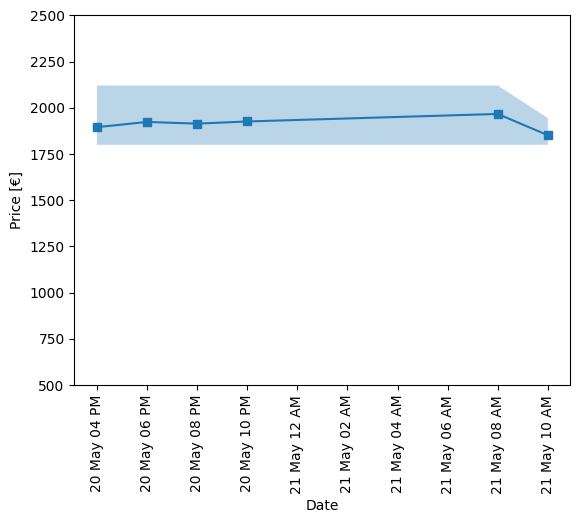

In [19]:
plot_df(df = swiss_air_sao)

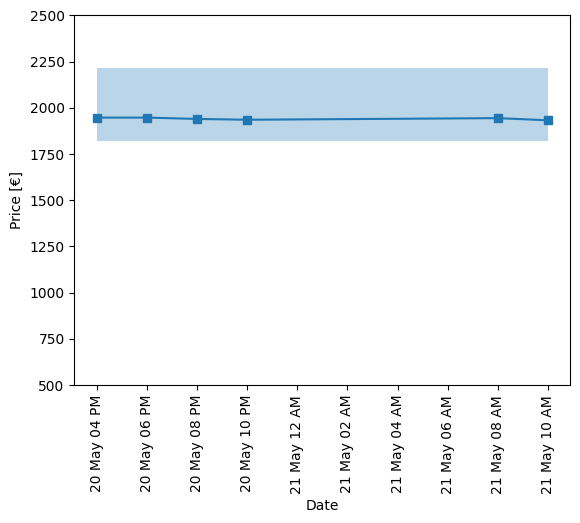

In [20]:
plot_df(df = lufthansa_air_sao)

## Bar Chart

1. NYC

In [21]:
plot_data_1 = nyc[["date", "ticket_price", "out_airline_company", "tot_duration"]]

<Axes: xlabel='ticket_price', ylabel='date'>

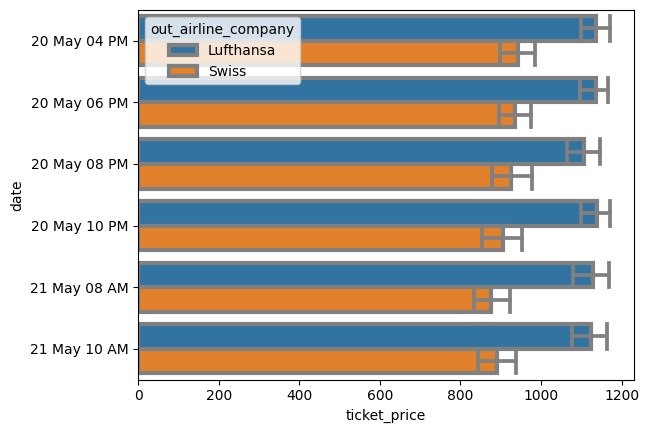

In [22]:
sns.barplot(data = plot_data_1, x='ticket_price', y='date', hue='out_airline_company',estimator='mean', capsize=.4, errcolor=".5",
    linewidth=3, edgecolor=".5")

2. São Paulo

In [23]:
plot_data_2 = sao[["date", "ticket_price", "out_airline_company", "tot_duration"]]
plot_data_2

,date,ticket_price,out_airline_company,tot_duration
0,20 May 04 PM,2115.75,Lufthansa,1 days 04:25:00
1,20 May 04 PM,1948.60,Lufthansa,1 days 07:50:00
2,20 May 04 PM,1948.60,Lufthansa,1 days 08:40:00
3,20 May 04 PM,1948.60,Lufthansa,1 days 09:50:00
4,20 May 04 PM,1948.60,Lufthansa,1 days 09:50:00
...,...,...,...,...
260,21 May 10 AM,1944.42,Swiss,1 days 15:40:00
261,21 May 10 AM,1944.42,Swiss,1 days 23:10:00
262,21 May 10 AM,1944.42,Swiss,2 days 00:40:00
263,21 May 10 AM,1799.72,Swiss,2 days 04:25:00


<Axes: xlabel='ticket_price', ylabel='date'>

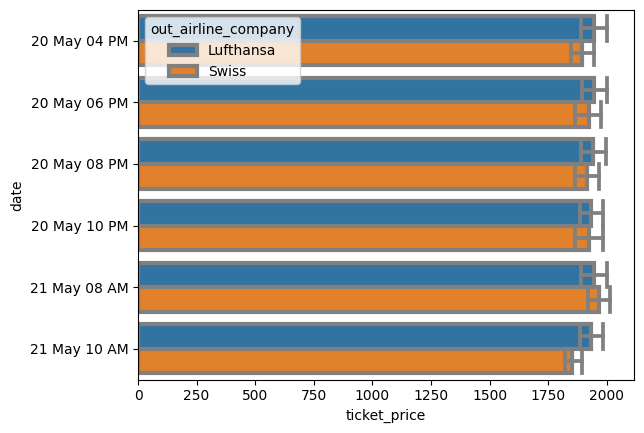

In [24]:
sns.barplot(data = plot_data_2, x='ticket_price', y='date', hue='out_airline_company',estimator='mean', capsize=.4, errcolor=".5",
     linewidth=3, edgecolor=".5")

## Scatter Plot

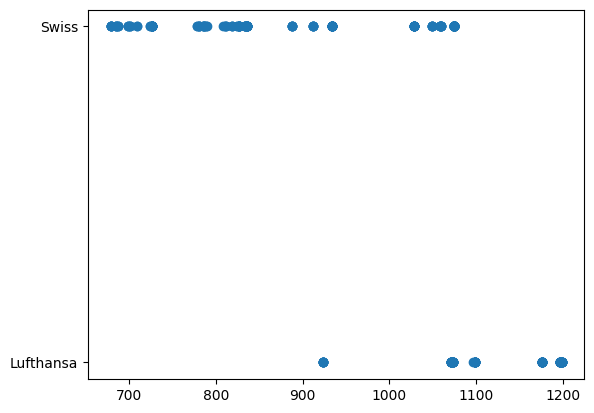

In [25]:
plt.scatter(x=plot_data_1["ticket_price"], y=plot_data_1["out_airline_company"])

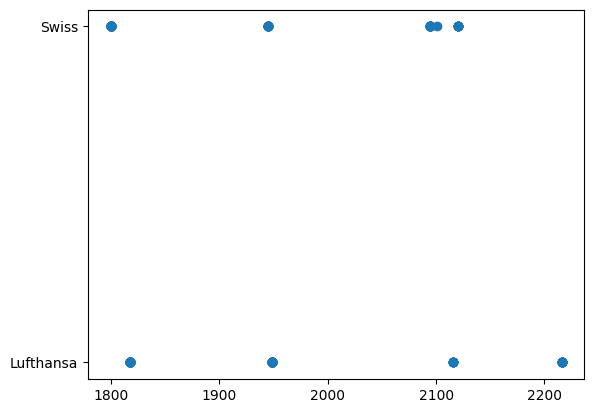

In [26]:
plt.scatter(x=plot_data_2["ticket_price"], y=plot_data_2["out_airline_company"])

## Heatmap

1. NYC

<Axes: xlabel='out_airline_company', ylabel='date'>

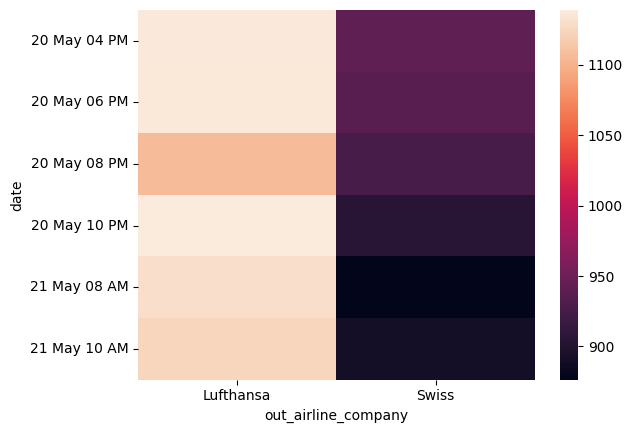

In [27]:
data_pivot = plot_data_1.pivot_table(index='date', columns='out_airline_company', values='ticket_price', aggfunc='mean')

# create the heatmap
sns.heatmap(data_pivot)

2. Sao

<Axes: xlabel='out_airline_company', ylabel='date'>

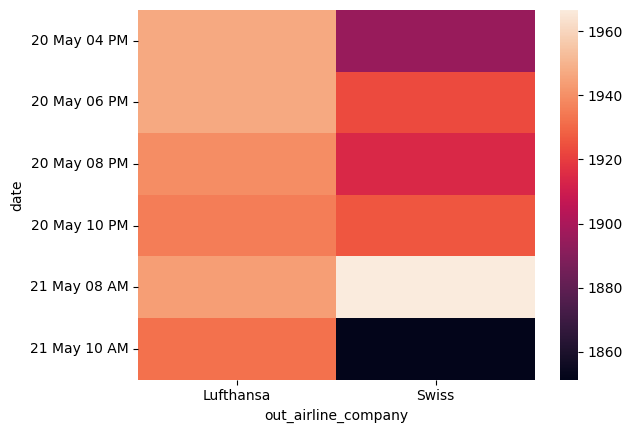

In [28]:
data_pivot = plot_data_2.pivot_table(index='date', columns='out_airline_company', values='ticket_price', aggfunc='mean')

# create the heatmap
sns.heatmap(data_pivot)